# Modele analizy danych

Tomasz Rodak

---

### Zadanie 4.1

Niech $Y=2+3X+\varepsilon$, gdzie $\varepsilon\sim N(0,1)$, $X\sim N(0,1)$.

1. Wyznacz 95% przedział ufności dla współczynnika kierunkowego $\beta_1$ w modelu regresji liniowej $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$ dla $n=100$ obserwacji. Czy wartość $\beta_1=3$ zawiera się w przedziale ufności?
2. Powtórz symulację 1000 razy. Jak często wartość $\beta_1=3$ jest pokryta przez przedział ufności?


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


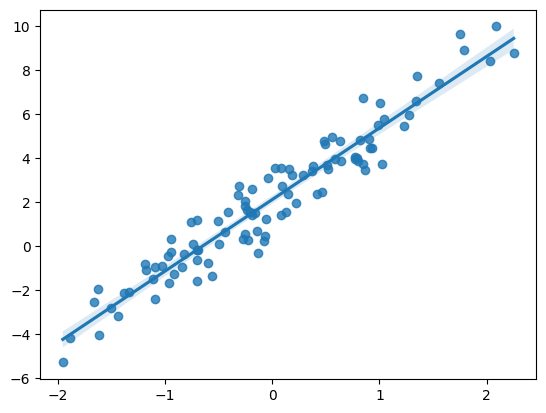

In [14]:
a, b = 2, 3
n = 100

X = np.random.normal(size=n)
y = a + b * X + np.random.normal(size=n)

sns.regplot(x=X, y=y);

In [15]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1165.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           3.40e-56
Time:                        17:14:19   Log-Likelihood:                -129.17
No. Observations:                 100   AIC:                             262.3
Df Residuals:                      98   BIC:                             267.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1156      0.089     23.781      0.000       1.939       2.292
x1             3.2515      0.095     34.126      0.000       3.062       3.441
==============================================================================
Omnibus:                        4.269   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.239
Skew:                          -0.011   Prob(JB):                        0.326
Kurtosis:                       2.267   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Zadanie 4.2

Kontynuacja zadania 4.1.

1. Wyznacz 95% przedział ufności dla wartości oczekiwanej $E(Y|X=x_0)$ oraz dla wartości obserwowanej $Y_0$ dla $x_0=0.2$. Czy wartość $E(Y|X=x_0)=2+3x_0$ zawiera się w przedziale ufności?
2. Powtórz symulację 1000 razy. Jak często wartości $E(Y|X=x_0)=2+3x_0$ oraz $Y_0=2+3x_0+\varepsilon$ są pokryte przez odpowiednie przedziały ufności?

Przedziały ufności dla wartości oczekiwanej oraz wartości obserwowanej możesz wyznaczyć korzystając z metody `OLSResults.get_prediction()` z pakietu `statsmodels`.

In [24]:
model.conf_int(alpha=0.05)
results.conf_int(alpha=0.05)

array([[1.93903275, 2.29210861],
       [3.06240786, 3.44056562]])

In [34]:
A = np.zeros(1000, dtype=int)
for i in range (1000):
    X = np.random.normal(size=n)
    y = a + b * X + np.random.normal(size=n)
    model = sm.OLS(y, sm.add_constant(X)).fit()
    if model.conf_int(alpha=0.05)[1, 0] < b < model.conf_int(alpha=0.05)[1, 1]:
        A[i] = 1


In [35]:
A.sum() / 1000 * 100

np.float64(96.0)

In [41]:
X= np.random.normal(size=n)
y = a + b * X + np.random.normal(size=n)
model = sm.OLS(y, sm.add_constant(X)).fit()

x0 = .2
prediction = model.get_prediction([1, x0])

prediction.summary_frame(alpha = .05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.661356,0.099797,2.463312,2.8594,0.772415,4.550296


In [49]:
2 + 3*x0

2.6

In [61]:
y0 = a + b * x0 + np.random.normal()
y0

0.5903373202639659

### Zadanie 4.3

Niech $\mathcal{T}=\{(x_1,y_1),\ldots,(x_n,y_n)\}\subset\mathbb{R}^2$ będzie zbiorem obserwacji i niech

\begin{equation*}
\text{RSS}(\beta_0,\beta_1) = \sum_{i=1}^n (y_i-\beta_0-\beta_1x_i)^2
\end{equation*}

będzie sumą kwadratów reszt w modelu regresji liniowej $\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$. Jeśli optymalizacja modelu została przeprowadzona metodą najmniejszych kwadratów, to estymatory $\hat{\beta}_0$ i $\hat{\beta}_1$ są zdefiniowane jako:

\begin{equation*}
[\hat{\beta}_0,\hat{\beta}_1]^T = \arg\min_{\beta_0,\beta_1} \text{RSS}(\beta_0,\beta_1)
\end{equation*}

Wykaż, że wówczas

\begin{equation*}
\begin{split}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2},\\
\hat{\beta}_0 &= \bar{y}-\hat{\beta}_1\bar{x},
\end{split}
\end{equation*}

gdzie $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$, $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$.

### Zadanie 4.4

Niech $\mathcal{T}=\{(x_1,y_1),\ldots,(x_n,y_n)\}\subset\mathbb{R}^2$ będzie zbiorem obserwacji i niech

\begin{equation*}
\hat{y} = \hat{\beta}_0+\hat{\beta}_1x
\end{equation*}

będzie dopasowanym do danych (metodą najmniejszych kwadratów) modelem regresji liniowej. Wykaż, że prosta regresji przechodzi przez punkt $(\bar{x},\bar{y})$, gdzie $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$, $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$.

### Zadanie 4.5

Zbiór [`Auto.csv`](https://www.statlearning.com/s/Auto.csv) zawiera dane dotyczące modeli samochodów. Dane zawierają następujące kolumny:

1. `mpg` -- liczba mil, jakie samochód przejeżdża na jednym galonie paliwa,
2. `cylinders` -- liczba cylindrów w silniku,
3. `displacement` -- pojemność silnika (w calach sześciennych),
4. `horsepower` -- moc silnika,
5. `weight` -- waga samochodu (w funtach),
6. `acceleration` -- przyspieszenie (w sekundach od 0 do 60 mil na godzinę),
7. `year` -- rok produkcji (modulo 100),
8. `origin` -- pochodzenie samochodu (1. USA, 2. Europa, 3. Japonia),
9. `name` -- nazwa samochodu.

Zmienną objaśnianą jest `mpg`, pozostałe zmienne są zmiennymi objaśniającymi.

Pobierz do ramki danych `pd.DataFrame` zbiór [`Auto.csv`](https://www.statlearning.com/s/Auto.csv).

1. Wykonaj wykresy rozproszenia wszystkich par zmiennych numerycznych względem siebie (`pd.plotting.scatter_matrix` lub `sns.pairplot`).
2. Zbuduj macierz korelacji zmiennych numerycznych (`pd.DataFrame.corr` plus `sns.heatmap`).

Skomentuj wyniki.

### Zadanie 4.6

Zbuduj model regresji liniowej zmiennej `mpg` w zależności od `horsepower`. Wykorzystaj pakiet `statsmodels`. Wyświetl podsumowanie modelu. Zbuduj wykres rozrzutu z dopasowaną prostą regresji.

1. Przedstaw model w postaci równania regresji: $\widehat{\text{mpg}}=\hat{\beta}_0+\hat{\beta}_1\cdot\text{horsepower}$.
1. Czy zmienna `mpg` zależy od `horsepower`?
2. Jak silny jest związek między `mpg` a `horsepower`?
3. Czy zależność jest dodatnia czy ujemna?
4. Jak zmieni się `mpg` wraz ze wzrostem `horsepower` o 20?
4. Jaką wartość przewiduje model dla `mpg` przy `horsepower=98`? Jak wygląda przedział ufności i predykcji dla tej wartości (metoda `OLSResults.get_prediction()`)?

### Zadanie 4.6

Rozwiąż zadania 2.4.1 i 2.4.2 z książki [ISLP](https://www.statlearning.com/) (strona 63).